# **Hybrid System for Lung Cancer Classification**

Created by : Harjinder Singh <br>
Email : hjbrar7@gmail.com

Here i will create a Hybrid System using **Particle Swarm Optimisation** and **Logistic Regression**.

We will see how to use **PSO** to extract usefull features from dataset and then train our model on these features.

### **Importing Useful Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

### **Importing Dataset**

Dataset that we are using here is taken from **UCI Machine Learning Repository**. <br>
Link to dataset is <a href="http://archive.ics.uci.edu/ml/datasets/Lung+Cancer" > Lung Cancer Dataset </a> <br>

This dataset contain 32 examples and 56 attributes. <br>
some of its fields are missing So we need to Purify this dataset before using it in out ML model.

---
### ***Note :***
This dataset is not big enough to train good Machine Learning Model


In [2]:
data_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/lung-cancer/lung-cancer.data"
data = pd.read_csv(data_url,header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,1,0,3,0,?,0,2,2,2,1,...,2,2,2,2,2,1,1,1,2,2
1,1,0,3,3,1,0,3,1,3,1,...,2,2,2,2,2,2,2,1,2,2
2,1,0,3,3,2,0,3,3,3,1,...,2,2,2,2,2,2,2,2,1,2
3,1,0,2,3,2,1,3,3,3,1,...,2,2,2,2,2,2,2,2,2,2
4,1,0,3,2,1,1,3,3,3,2,...,2,2,2,2,2,2,2,1,2,2


In [3]:
data.describe()

,0,1,2,3,5,6,7,8,9,10,...,47,48,49,50,51,52,53,54,55,56
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,2.031250,0.031250,2.375000,2.031250,0.281250,2.187500,2.125000,2.406250,1.156250,1.406250,...,2.062500,2.062500,2.000000,2.000000,2.000000,1.843750,1.843750,1.562500,1.812500,1.718750
std,0.782237,0.176777,0.553581,1.031265,0.456803,0.737804,0.751343,0.756024,0.514899,0.559918,...,0.245935,0.245935,0.359211,0.359211,0.508001,0.447889,0.447889,0.504016,0.396558,0.456803
min,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,0.000000,2.000000,1.750000,0.000000,2.000000,2.000000,2.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
50%,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,3.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,3.000000,0.000000,3.000000,3.000000,1.000000,3.000000,3.000000,3.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,3.000000,1.000000,3.000000,3.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 57 columns):
0     32 non-null int64
1     32 non-null int64
2     32 non-null int64
3     32 non-null int64
4     32 non-null object
5     32 non-null int64
6     32 non-null int64
7     32 non-null int64
8     32 non-null int64
9     32 non-null int64
10    32 non-null int64
11    32 non-null int64
12    32 non-null int64
13    32 non-null int64
14    32 non-null int64
15    32 non-null int64
16    32 non-null int64
17    32 non-null int64
18    32 non-null int64
19    32 non-null int64
20    32 non-null int64
21    32 non-null int64
22    32 non-null int64
23    32 non-null int64
24    32 non-null int64
25    32 non-null int64
26    32 non-null int64
27    32 non-null int64
28    32 non-null int64
29    32 non-null int64
30    32 non-null int64
31    32 non-null int64
32    32 non-null int64
33    32 non-null int64
34    32 non-null int64
35    32 non-null int64
36    32 non-null int64
37    32

## Preprocessing

In [5]:
# Convert the column name
data.columns = [str(x) for x in range(len(data.columns))]

We will find the Columns with missing data and then fill the missing values

In [6]:
cols = [ c for c in data.columns if np.dtype(data[c]) == 'O']
print("Columns with missing values are : ",cols)

print("Missing data is given with '?' ")
data[cols].head()

Columns with missing values are :  ['4', '38']
Missing data is given with '?' 


,4,38
0,?,2
1,1,1
2,2,2
3,2,2
4,1,1


Now we will convert these values to **np.int64** and convert **?** to **-1** <br>
Then we will fill these -1 (missing values) with **mean** of the columnn.

In [7]:
def convertValues(x):
    try : x = np.int64(x)
    except : x = -1
    return x

for c in cols:
    data[c] = pd.Series([convertValues(x) for x in data[c]])

print("Convert '?' to -1")
data[cols].head()

Convert '?' to -1


,4,38
0,-1,2
1,1,1
2,2,2
3,2,2
4,1,1


Now fill missing values

In [8]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values= -1,strategy = "mean")
data[cols] = imputer.fit_transform(data[cols])
data[cols].head()

,4,38
0,1.392857,2.0
1,1.000000,1.0
2,2.000000,2.0
3,2.000000,2.0
4,1.000000,1.0


## **Visualising Data**

First column is our target values

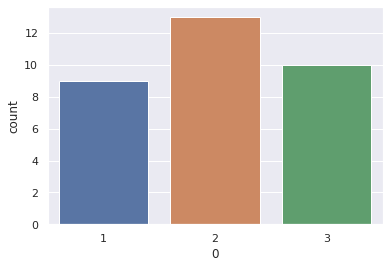

In [9]:
sns.countplot(x='0',data=data)

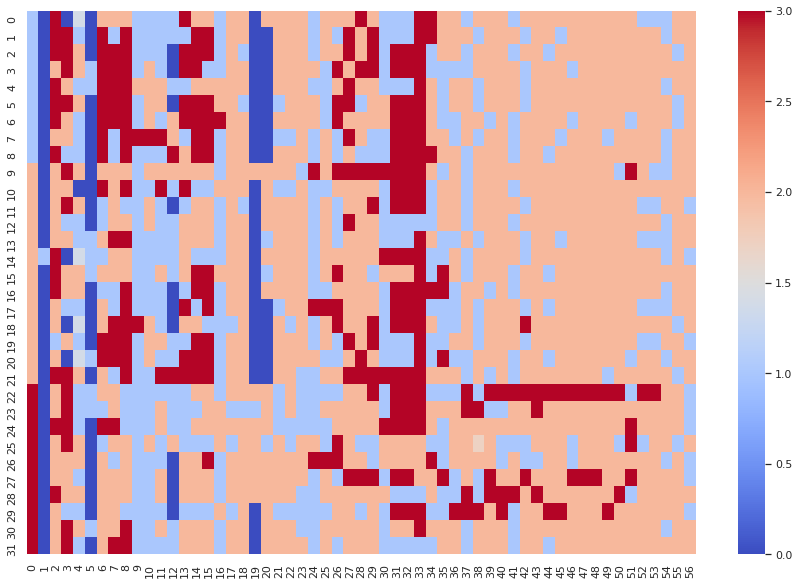

In [10]:
plt.subplots(figsize=(15,10))
sns.heatmap(cmap="coolwarm",data=data)

In above graph we can see a number of features are **Higly -vely corelated** while some are also **highly +vely corelated**. So now we need to extract only useful features that can esure us good Machine Learning Model

# **Extracting useful features using PSO**

Out of all these features, may be not all will participate for <br>
good accuracy. So we may have to choose only those features whose <br>
contribution can give us useful information.

So we will use **Particle Swarm Optimization** - *(PSO)* to <br>
extract usefull features from our dataset

In [11]:
# Installing Pyswarm Library

!python -m pip install pyswarms;

     |████████████████████████████████| 96 kB 1.9 MB/s eta 0:00:011


In [12]:
# importing the libraries
import pyswarms as ps

### Spliting data in Train and Test set

In [13]:
from sklearn.model_selection import train_test_split
X,y = data.iloc[:,1:].values, data.iloc[:,0].values

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3)
print("Xtrain shape ; {} \nytrain shape : {}".format(Xtrain.shape,ytrain.shape))

Xtrain shape ; (22, 56) 
ytrain shape : (22,)


### Use of PSO

In [14]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression Classifier
clf = LogisticRegression(solver='saga')

def cal_per_particle(mask,alpha,no_of_features=56):
    subset=None   
    if np.count_nonzero(mask) == 0:
        subset = Xtrain
    else :
        subset = Xtrain[:,mask==1]
    clf.fit(subset,ytrain)
    pred = (clf.predict(subset)==ytrain).mean()
    tmp = (alpha * (1.0 - pred) + (1.0 - alpha)* (1 - (subset.shape[1]/no_of_features)))
    return tmp

def calc(x,alpha=0.81):
    number_of_particles = x.shape[0]
    arr = [cal_per_particle(x[i],alpha) for i in range(number_of_particles)]
    return np.array(arr)

In [15]:
%%time

op1 = ['c1','c2']
ops = {'w':0.9,'k':30,'p':2}
for o in op1:
    ops[o] = np.random.random()
dims = Xtrain.shape[1]
optimizer = ps.discrete.BinaryPSO(n_particles=32, dimensions=dims, options=ops)
cost, pos = optimizer.optimize(calc, iters=800)
print("Options are : {}".format(ops))

2020-04-10 15:12:59,087 - pyswarms.discrete.binary - INFO - Optimize for 800 iters with {'w': 0.9, 'k': 30, 'p': 2, 'c1': 0.2172599464533037, 'c2': 0.5490737549116664}
pyswarms.discrete.binary: 100%|██████████|800/800, best_cost=0.0271
2020-04-10 15:14:29,168 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.027142857142857146, best pos: [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1]


Options are : {'w': 0.9, 'k': 30, 'p': 2, 'c1': 0.2172599464533037, 'c2': 0.5490737549116664}
CPU times: user 1min 29s, sys: 880 ms, total: 1min 30s
Wall time: 1min 30s


In [16]:
cols = data.columns[1:]
print("Selected features are : ")
print([c for c,p in zip(cols,pos) if p==1 ])
print("Excluded features are : ")
print([c for c,p in zip(cols,pos) if p==0 ])

Selected features are : 
['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '17', '18', '19', '20', '21', '23', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '40', '41', '43', '44', '45', '46', '47', '48', '51', '52', '53', '54', '55', '56']
Excluded features are : 
['1', '16', '22', '24', '39', '42', '49', '50']


### **Visualising PSO Optimizer Cost History**

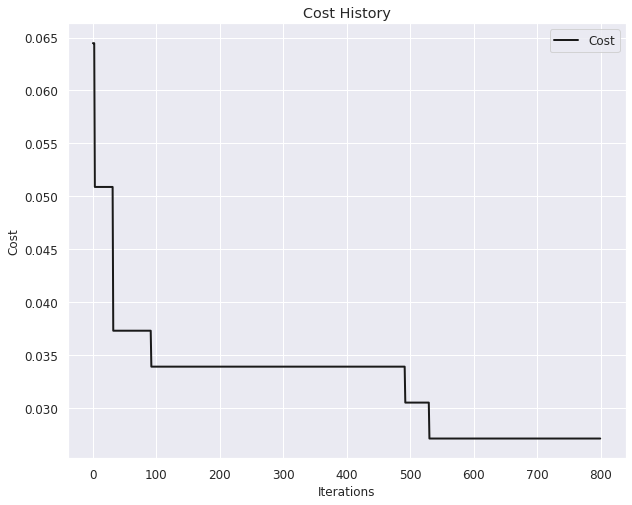

In [17]:
from pyswarms.utils.plotters import plot_cost_history

plot_cost_history(optimizer.cost_history)

## **Checking Model performance over Selected Features**

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

clf = LogisticRegression(solver='saga')
# selected trainging features
s_xtrain = Xtrain[:,pos==1]
clf.fit(s_xtrain,ytrain)

# selected testing features
s_xtest = Xtest[:,pos==1]

pred = clf.predict(s_xtest)

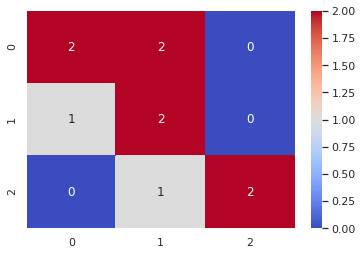

In [19]:
mat = confusion_matrix(ytest,pred)
sns.heatmap(mat, cmap="coolwarm",fmt='d',annot=True)

In [20]:
from sklearn.metrics import accuracy_score as ac

print("Accuracy Score : ",ac(ytest,pred))

Accuracy Score :  0.6


## **Hyper Parameter Tunning**
As we see that after extracting the features with the help of **PSO**<br>
We were able to achieve **0.6 accuracy score**.

So now we will try to Tune our model so that we can increase our accuracy with the selected features.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

Some parameters for Tunning. We will create different combinations of paramerters to check for best solution.

In [22]:
c_param = [0.001, 0.01, 0.1, 1, 10, 100]
p_param = ['l1','l2']

param_list = [(c,p) for c in c_param for p in p_param]
print("Combinations are : ",param_list)

Combinations are :  [(0.001, 'l1'), (0.001, 'l2'), (0.01, 'l1'), (0.01, 'l2'), (0.1, 'l1'), (0.1, 'l2'), (1, 'l1'), (1, 'l2'), (10, 'l1'), (10, 'l2'), (100, 'l1'), (100, 'l2')]


We will keep a track of **C**, **penality** and **accuracy** so that we can use hyper parameters in our final Model.

In [23]:
C=None
P=None
Accu=0.0

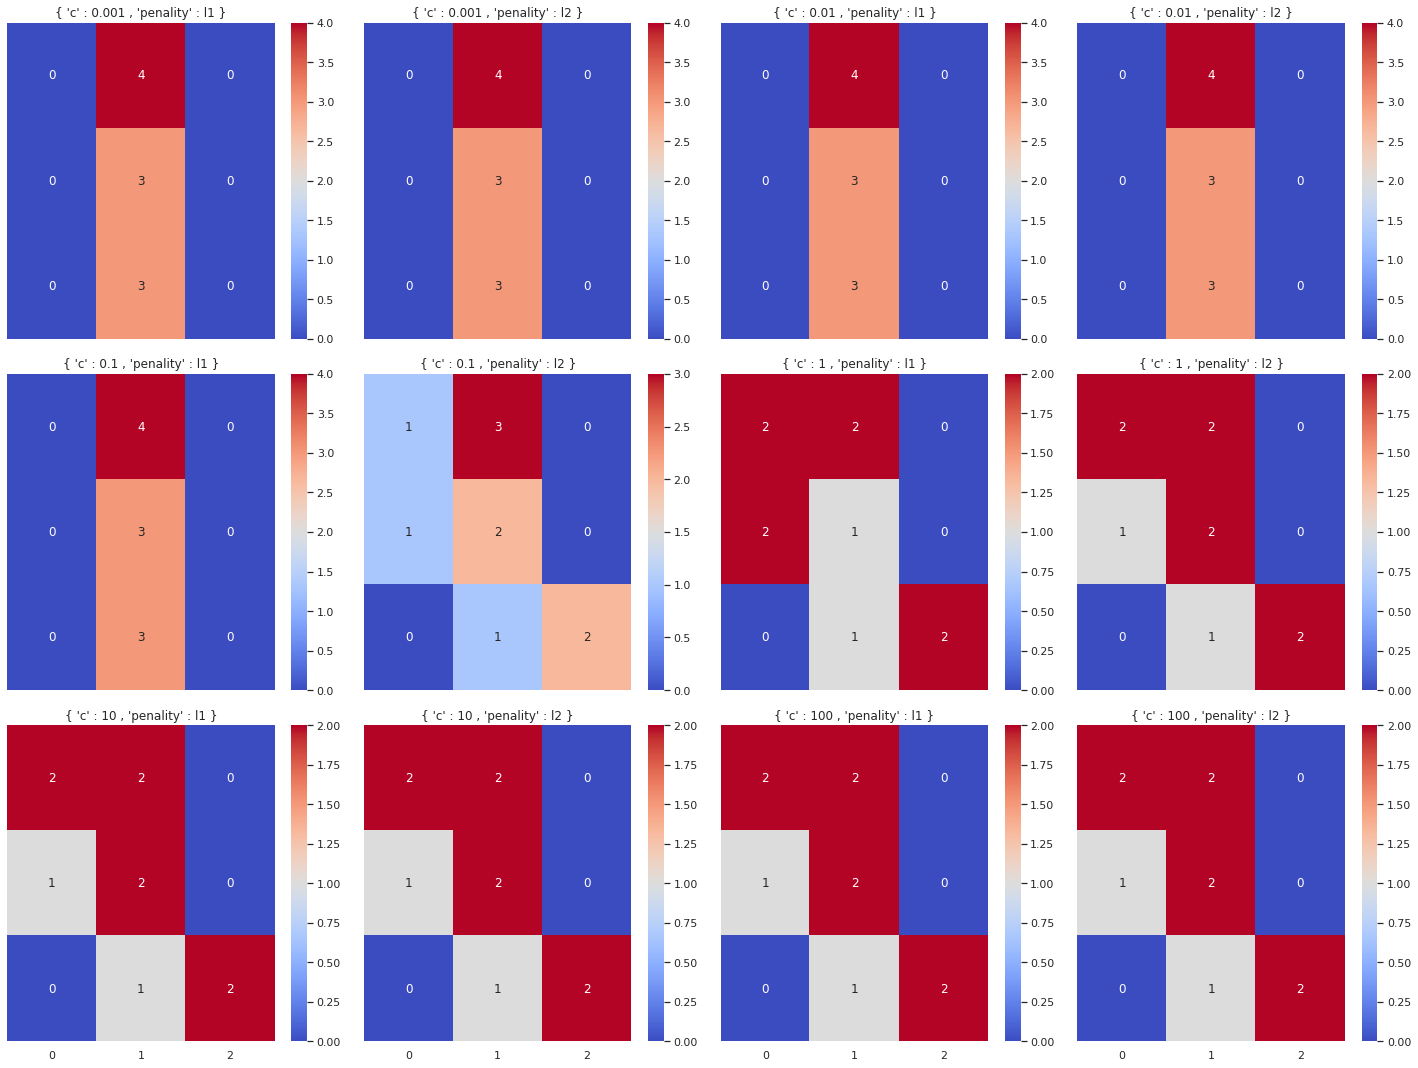

In [24]:
i,j=0,0
f, axes = plt.subplots(3, 4, figsize=(20, 15), sharex=True)
sns.despine(left=True)
s_xtrain = Xtrain[:,pos==1]
s_xtest = Xtest[:,pos==1]

for c,p in param_list:
    clf = LogisticRegression(solver='saga',penalty=p,C=c)
    clf.fit(s_xtrain,ytrain)
    pred = clf.predict(s_xtest)
    acc_score = accuracy_score(ytest,pred)
    if acc_score > Accu:
        Accu = acc_score
        C,P=c,p
    cm = confusion_matrix(ytest,pred)
    axes[i,j].set_title("{ 'c' : "+str(c)+" , 'penality' : "+p+" }")
    sns.heatmap(cm,cmap="coolwarm",fmt='d',annot=True,ax=axes[i,j])
    if j == 3: i = (i+1)%4
    j = (j+1)%4

plt.setp(axes, yticks=[])
plt.tight_layout()

### Result after Hyper Parameter Tunning

In [25]:
print("Best Accuracy : ",Accu)
print("Penalty : ",P)
print("C : ",c)

Best Accuracy :  0.6
Penalty :  l2
C :  100


As we can see that after Hyper Parameter Tunning the <br>
accuracy score os **0.6** which is quite good as per dataset.

# **Finalizing the Hybrid Model**

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report
from sklearn.model_selection import cross_val_predict, cross_val_score, KFold

Accuracy Score :  0.5


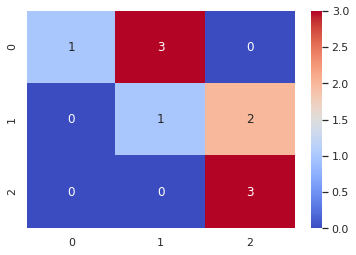

In [27]:
xtrain,xtest,ytrain,ytest = train_test_split(X[:,pos==1],y,test_size=0.3)

model = LogisticRegression(penalty=P,C=C,solver='saga')
model.fit(xtrain,ytrain)

pred = model.predict(xtest)

print("Accuracy Score : ",accuracy_score(ytest,pred))
c_mat = confusion_matrix(ytest,pred)
sns.heatmap(c_mat,cmap="coolwarm",fmt='d',annot=True)

In [28]:
cr = classification_report(ytest,pred,output_dict=True)
print(cr)

{'1': {'precision': 1.0, 'recall': 0.25, 'f1-score': 0.4, 'support': 4}, '2': {'precision': 0.25, 'recall': 0.3333333333333333, 'f1-score': 0.28571428571428575, 'support': 3}, '3': {'precision': 0.6, 'recall': 1.0, 'f1-score': 0.7499999999999999, 'support': 3}, 'accuracy': 0.5, 'macro avg': {'precision': 0.6166666666666667, 'recall': 0.5277777777777778, 'f1-score': 0.4785714285714285, 'support': 10}, 'weighted avg': {'precision': 0.655, 'recall': 0.5, 'f1-score': 0.47071428571428575, 'support': 10}}


In [29]:
cr_df = pd.DataFrame(cr)
cr_df = cr_df.transpose()

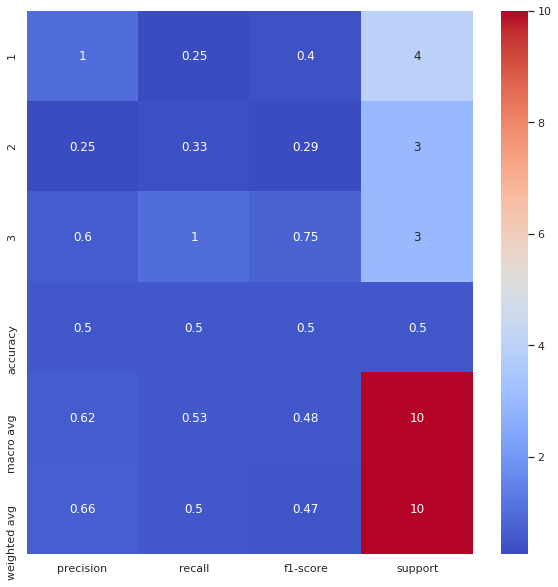

In [30]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cr_df,annot=True,cmap="coolwarm",ax=ax)

In [31]:
cr_df

,precision,recall,f1-score,support
1,1.000000,0.250000,0.400000,4.0
2,0.250000,0.333333,0.285714,3.0
3,0.600000,1.000000,0.750000,3.0
accuracy,0.500000,0.500000,0.500000,0.5
macro avg,0.616667,0.527778,0.478571,10.0
weighted avg,0.655000,0.500000,0.470714,10.0


# **Summary**

During this project the main motive was to use Soft Computing to make Hybrid System.<br>
So i used **Particle Swarm Optimization - (PSO)** with **Logistic Regression** to create a <br>
Hybrid System which extract features using PSO and then apply logistic Regression<br>
on the data to classify different type of Lung Cancer.


The data we used in this Project is available opensource on UCI Machine Learning <br>
Repository. At last i was able to create Hybrid model that i used on this dataset.

### Main Concepts used in this are


*   Preprocessing Dataset
*   Visualizing Data
*   Feature Extraction using PSO
*   Check Model Perfomance over Selected Features
*   Hyper Parameter Tunning
*   Finalising Model with Logistic Regression
*   Classification Report
   

---



---



